# 3.1.1 [KNN classifier](https://courses.thinkful.com/data-201v1/project/3.1.1)

# Challenge: Implement the Nearest Neighbor algorithm
* Code a Nearest Neighbor algorithm that works for two dimensional data

In [40]:
distance_list = []
song_type = []

def calc_distance(var_1, var_2, test_1, test_2):
    '''Return the distance between a trial with a known outcome
    and an instance I am trying to classify
    '''
    distance = np.sqrt((var_1 - test_1)**2 + (var_2 - test_2)**2)

In [41]:
duration = 190
loudness = 24
distance_list = []
music_list = []

n = len(music.iloc[:,0])
for i in range(n):
    distance = calc_distance(music.iloc[i,0],
                             music.iloc[i,1],
                             duration, loudness)
    distance_list.append(distance)
    music_list.append(music.iloc[i,2])
sorted_distance = pd.DataFrame(data={"jazz":music_list, "distance":distance_list}
            ).sort_values(by='distance').reset_index(drop=True)
print(sorted_distance.iloc[0])

distance    None
jazz           1
Name: 0, dtype: object


Questions:
1. what is a mesh - think its a 3D representation of a graph
2. What is a decision boundary? I'm guessing its limiting potential outcomes in some way

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

### K Nearest Neighbors Classifiers
* Naive Bayes: learning via probability
* Regression: learning via erros
* K Nearest Neighbor: learning via similarity

#### Nearest Neighbor
* let's classify a song as either "rock" or "jazz"
* duration measured in seconds
* loudness measured in decibel

In [3]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

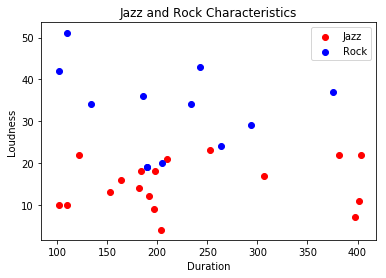

In [4]:
# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)

plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)

plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

### Simplest for of a similarity model is the Nearest Neighbor model
This works quite simply: when trying to predict an observation we find the closest (or nearest) known observation in our training data and use that value to make our prediction

In this case we will use the model as a classifier
Outcome of interest will be the music category

To find which obersvation is "nearest" we need a way to measure distance. 

Euclidean Distance is frequently used, you don't have to use this distance but it is easy and can use the pythagorean theorum to identify the dinstance between a datapoint and the scenerio you are trying to predict.

Next you measure the distance from each point in our training data to the point we're trying to predict. The model will find the datapoint with the smallest distance and then apply that category to our prediction.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long
neighbors.predict([[24, 190]])

array([0])

The model is predicting that a song with 24 loudness and 190 seconds long is NOT Jazz.

Also note that Nearest Neighbor is a simplification of K-Nearest Neighbors

## K-Nearest Neighbors
_K-Nearest Neighbors_ (or"_KNN_") is the logical extension of Nearest Neighbor
* Instead of looking at just the single nearest datapoint to predict an outcome, we look at several of the nearest neighbors 
* _k_ represents the number of neighbors we choose to look at 
* Each of the _k_ neighbors gets to vote on what the predicted outcome should be

### This does a couple cool things
1. It smooths out the predictions - if only one neighbor gets to influence the outcome the model will explicitly overfits to the training data
2. This means instead of just predicting classes, we get implicit probabilities. If each of the _k_ neighbors gets a vote on the outcome, then the probability of the test example being from any given class $i$ is:
$$ \frac{votes_i}{k} $$
3. This model can accomodate as many classes as the data set necessitates

In [6]:
# Try the same classifier where K = 5
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long 
print(neighbors.predict([[24,190]]))
print(neighbors.predict_proba([[24,190]]))

[1]
[[ 0.4  0.6]]


Now our test prediction has changed. 
In using the five nearest neighbors there were two votes for rock and three for jazz so it was classified as a jazz song.

So while in the previous example it was classified as Rock because the nearest neighbor was Rock by looking at more neighbors we find out that there are more jazz songs near K

### Visualizing Our Decision bounds
$mesh$ - approach that will help visualize the decision bounds the code below illustrates what a "mesh" is

In [7]:
# Our data. Converting from data frames to arrays
# for the mesh
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary.
# We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

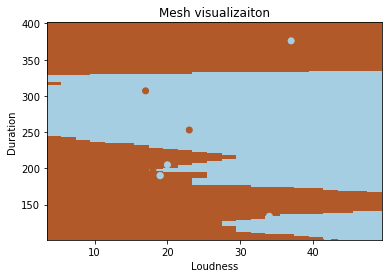

In [8]:
h = 2
np.arange(x_min, x_max, h)
np.arange(y_min, y_max, h)

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired) # set the colormap
plt.pcolormesh(xx, yy, Z)
# Add teh training points to the plot.
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualizaiton')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [9]:
def mesh_test(h):
    np.arange(x_min, x_max, h)
    np.arange(y_min, y_max, h)

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6,4))
    plt.set_cmap(plt.cm.Paired) # set the colormap
    plt.pcolormesh(xx, yy, Z)
    # Add teh training points to the plot.
    plt.scatter(X[:,0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualizaiton')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

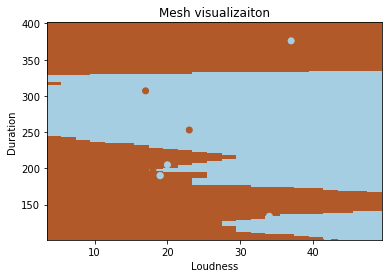

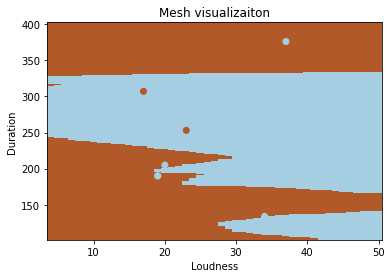

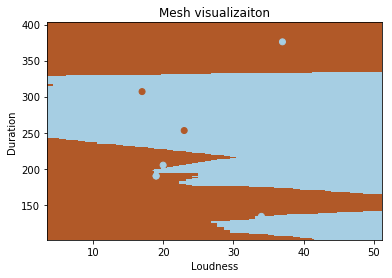

In [10]:
mesh_test(2)
mesh_test(1)
mesh_test(.9)


In [ ]:
mesh_test(.1)

1. Any new point that fell within a blue area would be predicted to be jazz
2. Any point that fell within a brown area would be predicted to be rock
3. The visualization isn't completely continuous - there are an infinite number of points in this space and we can't calculate the value for each one.

Mesh size (h = 4.0) was set to 4.0 meaning we calculate the value for each point in a grid where the points are space 4.0 away from eachother

You can adjust the mesh so that they are closer together creatigna more continuous visualization but it will be more computationally demanding

computing the Nearest neighbor visualization becomes computationally challenging around h=.001 and killed my kernal 